In [17]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
import os
import requests

## COCO Whole Body
anns: https://github.com/jin-s13/COCO-WholeBody/tree/master?tab=readme-ov-file

In [130]:
dataDir='../data/example_mscoco/'
dataType='val2017'
annFile='../data/annotations/coco_wholebody_val_v1.0.json'.format(dataDir,dataType)

In [131]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=1.85s)
creating index...
index created!


In [132]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person

COCO supercategories: 
person


In [133]:

# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person']);
imgIds = coco.getImgIds(catIds=catIds );
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

In [134]:
coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])

[{'license': 4,
  'file_name': '000000374083.jpg',
  'coco_url': 'http://images.cocodataset.org/val2017/000000374083.jpg',
  'height': 640,
  'width': 426,
  'date_captured': '2013-11-20 20:07:45',
  'flickr_url': 'http://farm3.staticflickr.com/2882/9264083800_fc3b02577d_z.jpg',
  'id': 374083}]

In [135]:
# def download_images():
#     for id in imgIds:
#         img = coco.loadImgs(id)[0]
#         url = img['coco_url']
#         try:
#             response = requests.get(url, stream=True)
#             response.raise_for_status()

#             with open(catDir + img['file_name'], 'wb') as file:
#                 for chunk in response.iter_content(chunk_size=8192):
#                     file.write(chunk)

#             print(f"Image saved successfully at {catDir + img['file_name']}")

#         except requests.exceptions.RequestException as e:
#             print(f"Error downloading image from {url}: {e}")


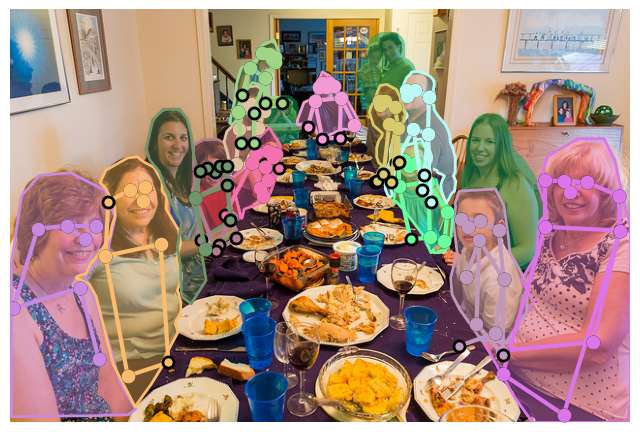

In [136]:
18380
img = coco.loadImgs(18380)[0]
url = img['coco_url']
I = io.imread(url)
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=18380, catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

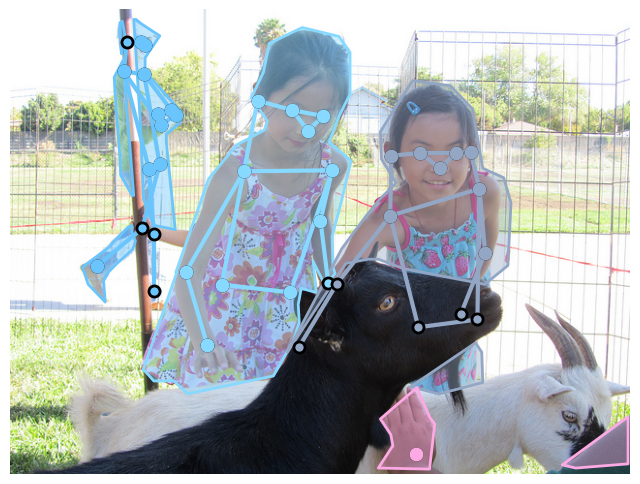

In [137]:
img = coco.loadImgs(8690)[0]
url = img['coco_url']
I = io.imread(url)
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=8690, catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)


In [138]:
anns[0]['iscrowd']

0

8

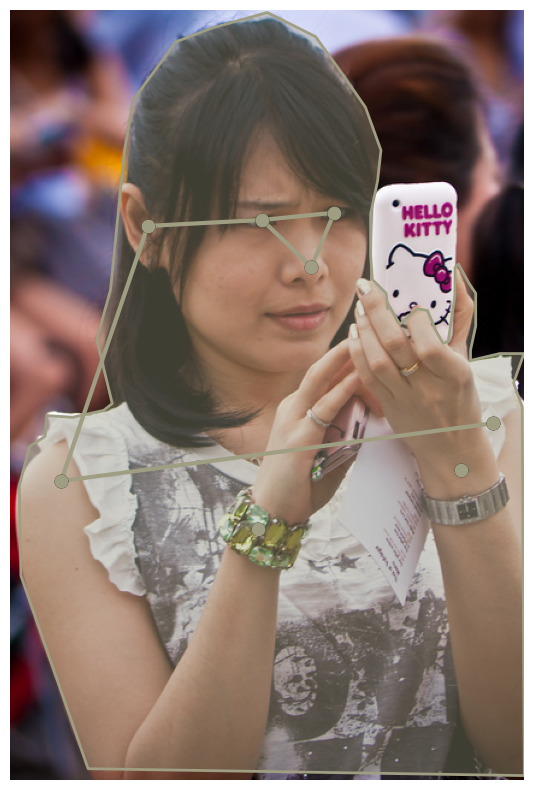

In [139]:
img = coco.loadImgs(1296)[0]
url = img['coco_url']
I = io.imread(url)
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=1296, catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns([anns[0]])
anns[0].keys()
anns[0]['num_keypoints']

In [140]:
anns[0].keys()

dict_keys(['segmentation', 'num_keypoints', 'area', 'iscrowd', 'keypoints', 'image_id', 'bbox', 'category_id', 'id', 'face_box', 'lefthand_box', 'righthand_box', 'lefthand_kpts', 'righthand_kpts', 'face_kpts', 'face_valid', 'lefthand_valid', 'righthand_valid', 'foot_valid', 'foot_kpts'])

In [141]:
anns[0]['iscrowd']

0

In [142]:
import cv2
img = coco.loadImgs(1296)[0]
url = img['coco_url']
I = io.imread(url)
annIds = coco.getAnnIds(imgIds=1296, catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)


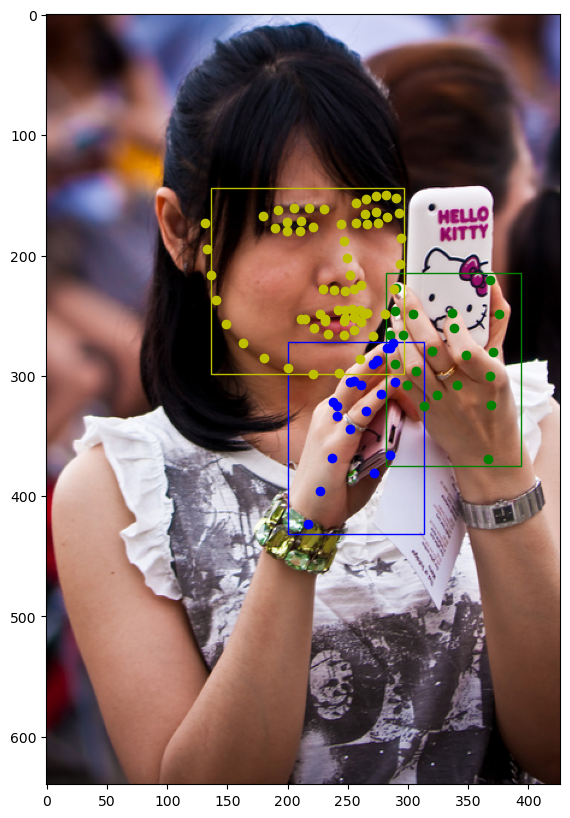

In [143]:
from matplotlib.patches import Rectangle
# other 11051
fig, ax = plt.subplots(1)
ax.imshow(I)
x, y, w, h = anns[0]['lefthand_box']
rect = Rectangle((x, y), w, h,
                 linewidth=1, edgecolor='g', facecolor='none')
ax.add_patch(rect)

points = anns[0]['lefthand_kpts']
j = 0
for i in range(int(len(points)/3)):
    ax.plot(points[j], points[j+1], 'go')
    j = j + 3

x, y, w, h = anns[0]['righthand_box']
rect = Rectangle((x, y), w, h,
                 linewidth=1, edgecolor='b', facecolor='none')
ax.add_patch(rect)
points = anns[0]['righthand_kpts']
j = 0
for i in range(int(len(points)/3)):
    ax.plot(points[j], points[j+1], 'bo')
    j = j + 3

x, y, w, h = anns[0]['face_box']
rect = Rectangle((x, y), w, h,
                 linewidth=1, edgecolor='y', facecolor='none')
ax.add_patch(rect)
points = anns[0]['face_kpts']
j = 0
for i in range(int(len(points)/3)):
    ax.plot(points[j], points[j+1], 'yo')
    j = j + 3


plt.show()

63


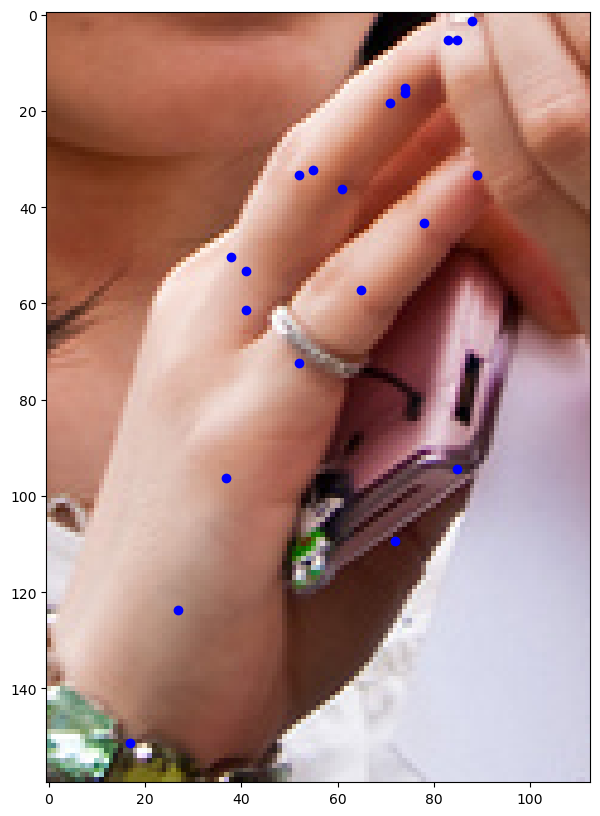

In [144]:
x, y, _w, _h = anns[0]['righthand_box']
x_ = int(x)
x_max = int(x+_w)
y_ = int(y)
y_max = int(y + _h)
fig, ax = plt.subplots(1)
ax.imshow(I[y_:y_max, x_:x_max])
img_h, img_w, img_ = I.shape
diff_h_ = img_h - y
diff_w_ = img_w - x
diff_w = img_w - diff_w_
diff_h = img_h - diff_h_ 
points = anns[0]['righthand_kpts']
j = 0
print(len(points))
for i in range(int(len(points)/3)):
    #if points[j+2] > 0.5:
    ax.plot(points[j] - diff_w, points[j+1] - diff_h, 'bo')
    j = j + 3
plt.show()

0.22742959856987
0.2361452877521515
0.2361452877521515
0.40456080436706543
0.3239585757255554
0.3264773190021515
0.6057682037353516
0.6649036407470703
0.44895216822624207
0.407373309135437
0.5409519672393799
0.5014725923538208
0.5953532457351685
0.455422580242157
0.6141000390052795
0.5971620678901672
0.5035480260848999
0.5361166596412659
0.5658991932868958
0.51066654920578
0.38492003083229065


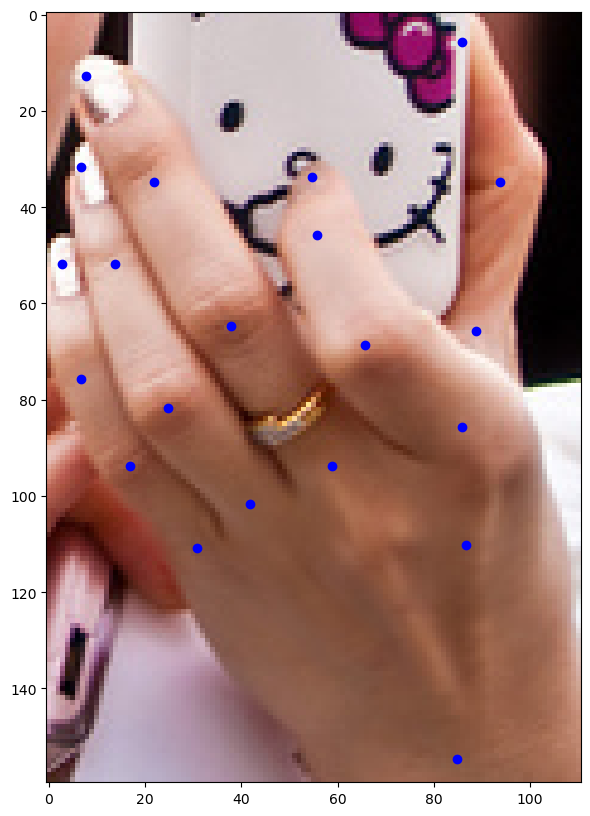

In [145]:
x, y, _w, _h = anns[0]['lefthand_box']
x_ = int(x)
x_max = int(x+_w)
y_ = int(y)
y_max = int(y + _h)
fig, ax = plt.subplots(1)
ax.imshow(I[y_:y_max, x_:x_max])
img_h, img_w, img_ = I.shape
diff_h_ = img_h - y
diff_w_ = img_w - x
diff_w = img_w - diff_w_
diff_h = img_h - diff_h_ 
points = anns[0]['lefthand_kpts']
j = 0
for i in range(int(len(points)/3)):
    if points[j+2] > 0.1:
        print(points[j+2])
        ax.plot(points[j] - diff_w, points[j+1] - diff_h, 'bo')
    j = j + 3
plt.show()


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


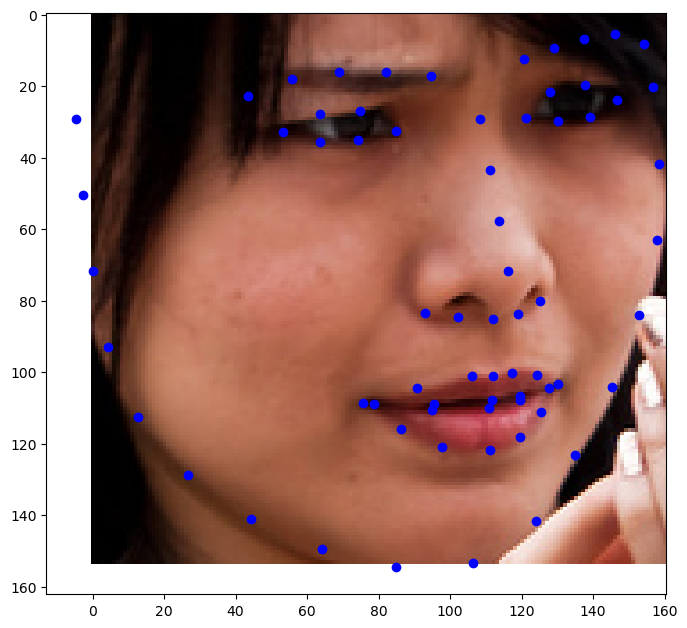

In [146]:
x, y, _w, _h = anns[0]['face_box']
x_ = int(x)
x_max = int(x+_w)
y_ = int(y)
y_max = int(y + _h)
fig, ax = plt.subplots(1)
ax.imshow(I[y_:y_max, x_:x_max])
img_h, img_w, img_ = I.shape
diff_h_ = img_h - y
diff_w_ = img_w - x
diff_w = img_w - diff_w_
diff_h = img_h - diff_h_ 
points = anns[0]['face_kpts']
j = 0
for i in range(int(len(points)/3)):
    if points[j+2] > 0.1:
        print(points[j+2])
        ax.plot(points[j] - diff_w, points[j+1] - diff_h, 'bo')
    j = j + 3
plt.show()


## MPII Person Dataset

- images: http://human-pose.mpi-inf.mpg.de/
- annotations: https://github.com/Arifkhan21/MPII-Dataset-in-CSV

In [147]:
import scipy.io
import pandas as pd

In [148]:
data_dir = '../data/example_mpII/'
ann_file = '../data/annotations/mpii_dataset.csv'

In [149]:
anns = pd.read_csv(ann_file)

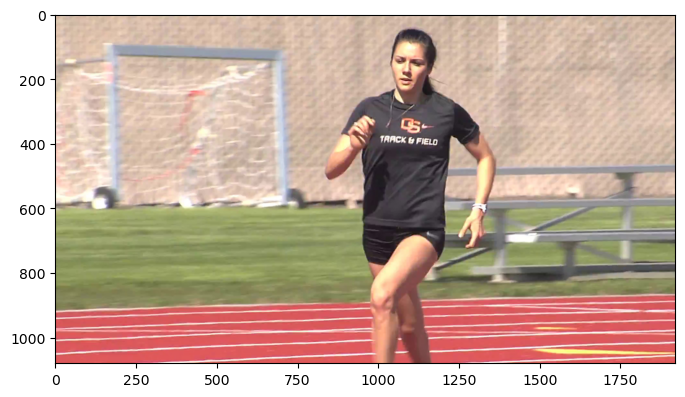

In [150]:
img = '000925252.jpg'
I = plt.imread(data_dir + img)
plt.imshow(I)
plt.show()
annotation = anns[anns['NAME'] == img]

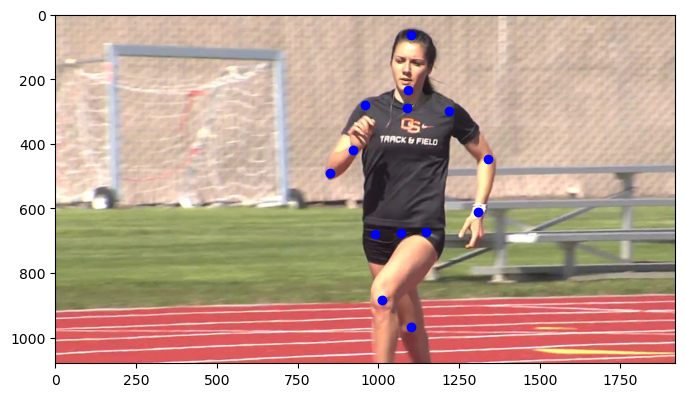

In [151]:
fig, ax = plt.subplots(1)
ax.imshow(I)

for col in annotation.columns:
    if "_X" in col:
        x_coord = annotation[col].values[0]
        y_coord = annotation[col[:-1] + 'Y'].values[0]
        if x_coord != -1 and y_coord != -1:
            ax.plot(x_coord, y_coord, 'bo')


plt.show()

## TRB MPII
- images from MPII
- annotations: https://github.com/kennymckormick/Triplet-Representation-of-human-Body

In [2]:
data_dir = '../data/example_mpII/'
ann_file = '../data/annotations/MPII_contour_points.json'

In [153]:
import json
with open(ann_file) as f:
    anns = json.load(f)

In [154]:
len(anns)

28883

In [155]:
img = '000925252.jpg'
I = plt.imread(data_dir + img)
annotation = [ann for ann in anns if ann['img_name'] == img][0]

In [156]:
annotation.keys()

dict_keys(['img_name', 'center', 'contour_keypoints'])

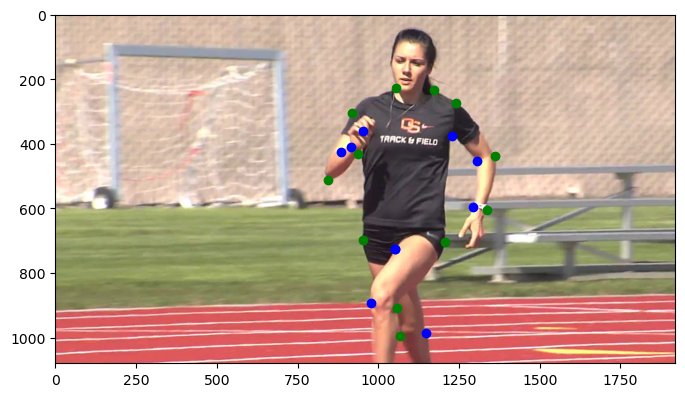

In [157]:
# NOTE: Basic Keypoints from MPII are not plotted here

fig, ax = plt.subplots(1)
ax.imshow(I)

for key in annotation['contour_keypoints']:
    x_coord, y_coord = annotation['contour_keypoints'][key]
    if x_coord != -1 and y_coord != -1:
            if 'medial' in key:
                ax.plot(x_coord, y_coord, 'bo')
            else:
                 ax.plot(x_coord, y_coord, 'go')

plt.show()

## FLIC
- source: https://bensapp.github.io/flic-dataset.html

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [53]:
import tensorflow_datasets as tfds

In [54]:
import scipy

In [55]:
builder = tfds.builder('flic')
builder.download_and_prepare()
flic_ds = builder.as_dataset(split = 'train', shuffle_files=True)

Dl Completed...: 0 url [00:00, ? url/s]


Dl Completed...:   0%|          | 0/1 [00:00<?, ? url/s]
Extraction completed...: 0 file [00:01, ? file/s]
Dl Size...: 0 MiB [00:01, ? MiB/s]
Dl Completed...: 100%|██████████| 1/1 [00:01<00:00,  1.12s/ url]


NonMatchingChecksumError: Artifact https://drive.google.com/uc?id=0B4K3PZp8xXDJN0Fpb0piVjQ3Y3M&export=download, downloaded to C:\Users\chhag\tensorflow_datasets\downloads\ucid_0B4K3PZp8xXDJN0Fpb0piVjQ3_export_downloadNUNzS-8Kt3-vJib4tdOUecY-WZkH0MGFw6Ic-27T47U.tmp.8dbf766ffd7649639016aa56950125f6\identifier, has wrong checksum:
* Expected: UrlInfo(size=286.35 MiB, checksum='778a4847f068592af40e959381c153838e4f68bb1d798e3824a9d88e5b881955', filename='FLIC.zip')
* Got: UrlInfo(size=168.95 KiB, checksum='360e88109a023474960756cf0a3839ae8718ae7cfb7e219b51485e57ebd52aa5', filename='identifier')
To debug, see: https://www.tensorflow.org/datasets/overview#fixing_nonmatchingchecksumerror

## LSP Dataset

source: https://github.com/axelcarlier/lsp

In [23]:
data_dir = '../data/lsp/images/'
ann_file = '../data/lsp/annotations/labels.npz'

In [36]:
labels = np.load(ann_file)
labels= labels['arr_0']

In [37]:
labels.shape

(3000, 2, 14)

In [39]:
img_files = os.listdir(data_dir)

0.0 -0.2486582335246109


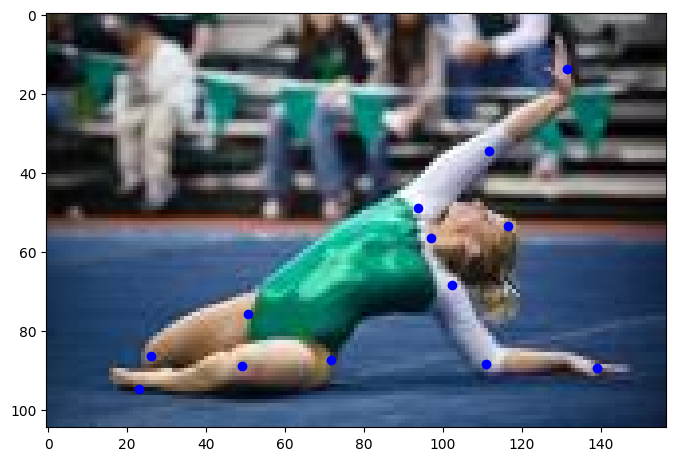

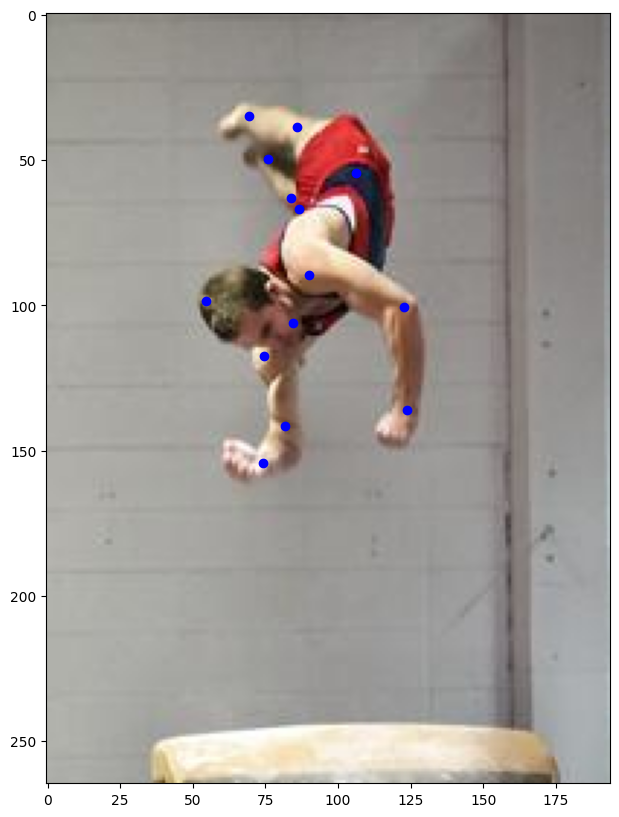

-0.1664547368946451 0.0
-0.1664547368946451 0.0
-0.1664547368946451 0.0


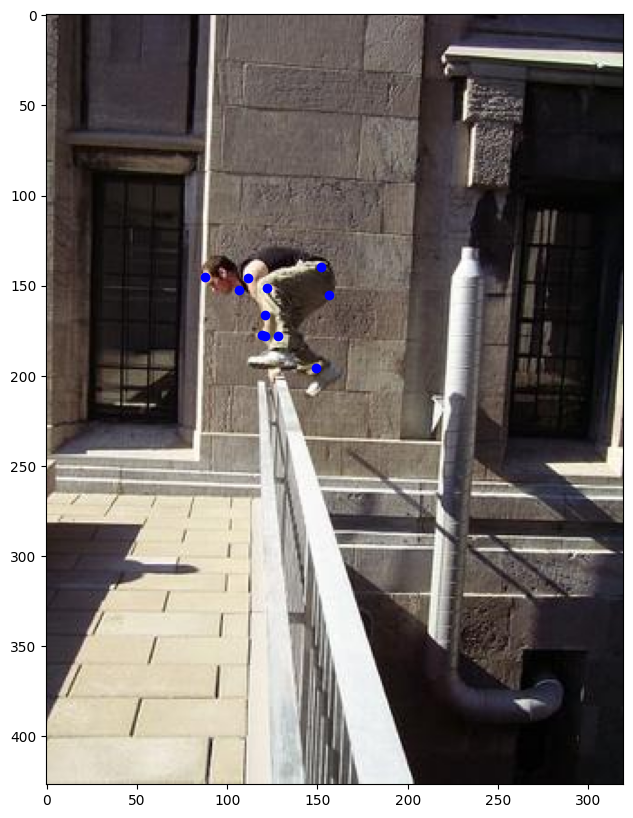

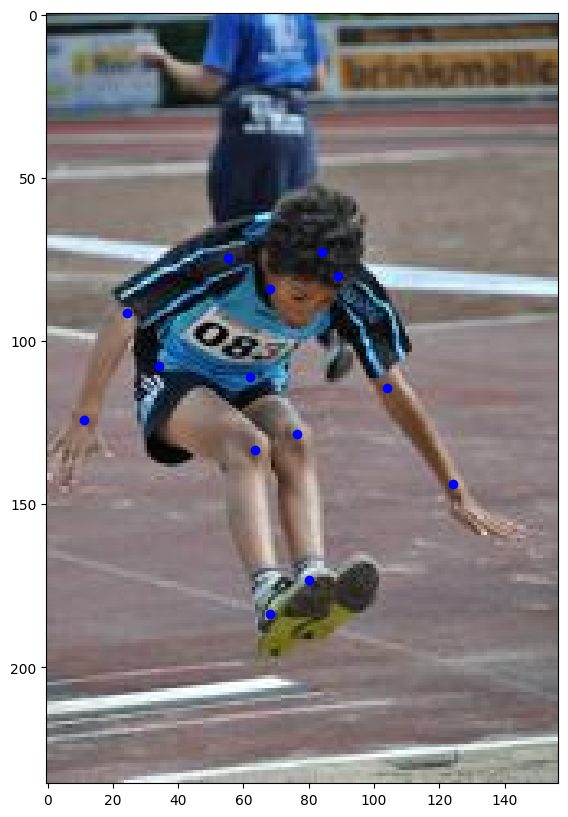

0.0 -0.16641833428850403
0.0 -0.16641833428850403
0.0 -0.16641833428850403
0.0 -0.16641833428850403


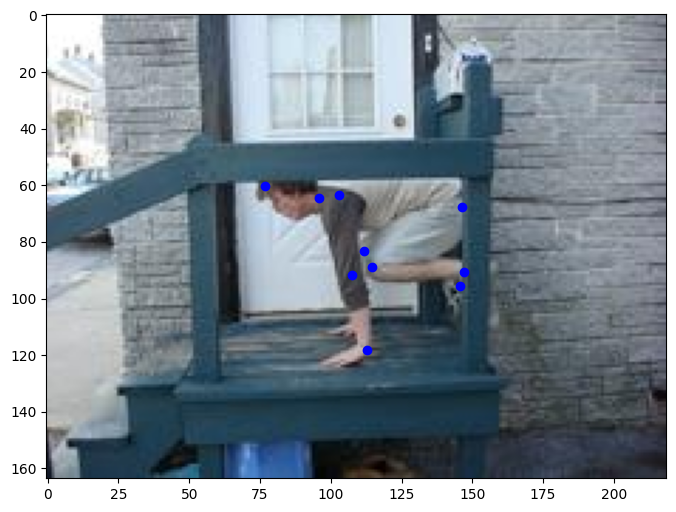

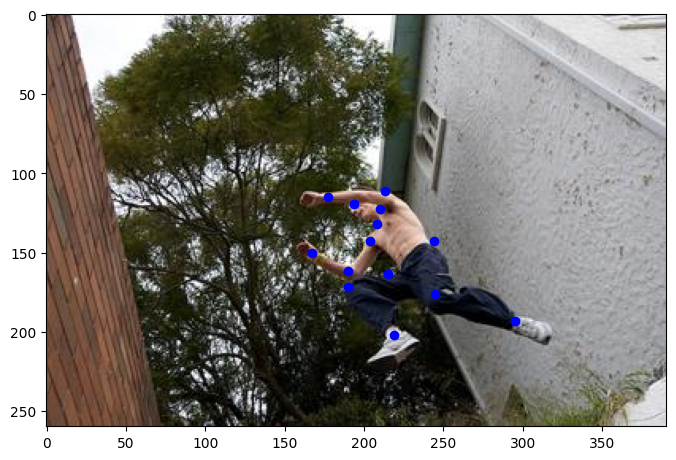

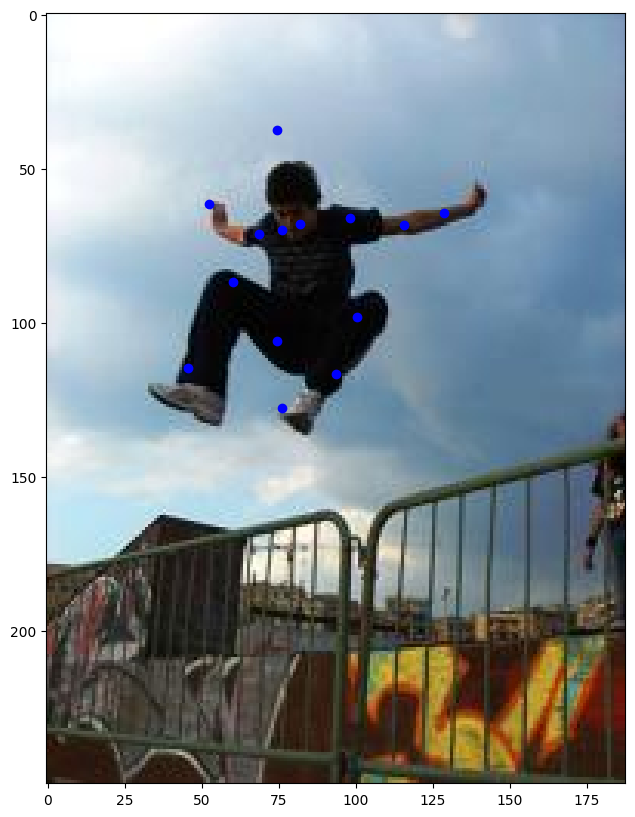

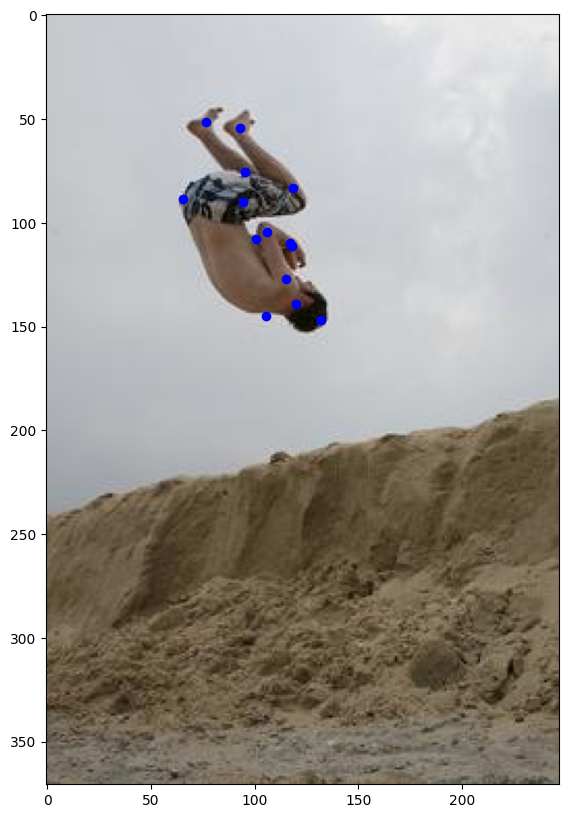

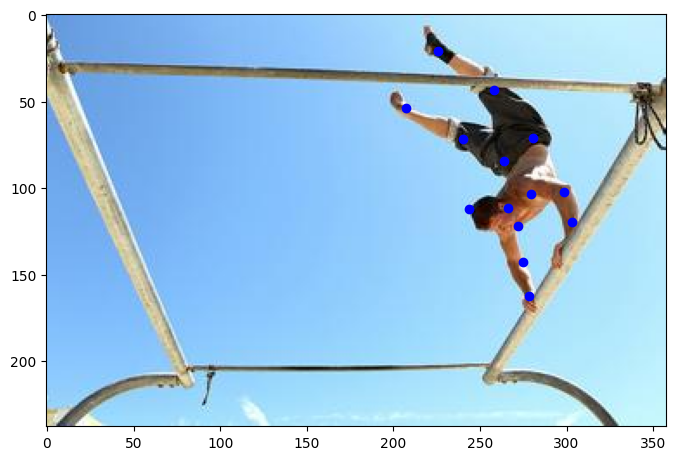

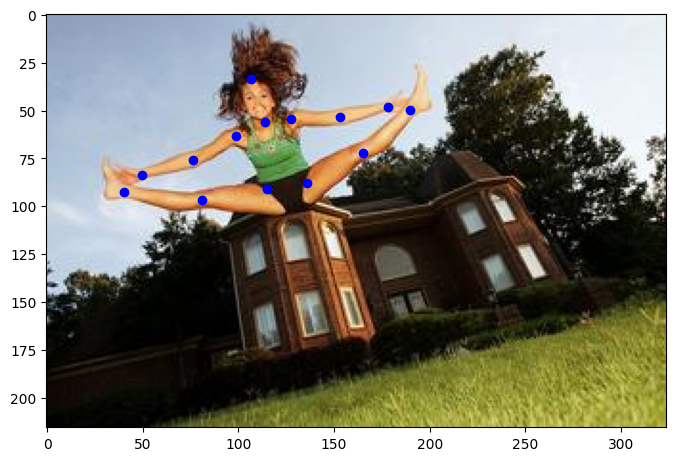

In [51]:
for i in range(0, 10):
    I = plt.imread(data_dir+img_files[i])
    h, w, _ = I.shape
    fig, ax = plt.subplots(1)
    ax.imshow(I)
    for kp in range(len(labels[i, 0])):
        x_coord = labels[i, 0, kp]
        y_coord = labels[i, 1, kp]
        if x_coord == 0 or y_coord == 0:
            print(x_coord, y_coord)
        else:
            ax.plot(x_coord * w, y_coord * h, 'bo')
    plt.show()
